In [174]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
import numpy as np

In [175]:
data = pd.read_csv("kickstarter_data.csv")

In [176]:
data['succes_rate'] = data['pled'] / data['goal']

In [177]:
df_1 = data[['text_am', 'succes_rate']]

In [18]:
train_X, test_X, train_y, test_y = train_test_split(df_1['text_am'], df_1['succes_rate'], train_size=0.8)

In [33]:
scaler = StandardScaler()

train_data = scaler.fit_transform(train_X.to_numpy().reshape(-1, 1))

model = LinearRegression()

model.fit(train_data, train_y)
model.predict(train_data)

array([[ 5.8614899 ],
       [18.48860379],
       [35.61041057],
       ...,
       [-6.27592981],
       [-5.85619196],
       [17.52670453]])

In [49]:
def test_mse(model, X, y):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    
    return mse

In [55]:
test_mse(model, train_data, train_y)

test_x_data = scaler.transform(test_X.to_numpy().reshape(-1, 1))
test_y_data = test_y.to_numpy().reshape(-1, 1)

test_mse(model, train_data, train_y), test_mse(model, test_x_data, test_y_data)

(257578.1781955013, 24494.97505449664)

In [59]:
lasso = Lasso()
lasso.fit(train_data, train_y)

test_mse(lasso, train_data, train_y), test_mse(lasso, test_x_data, test_y_data)

(257579.1781955014, 24465.26587780439)

In [61]:
ridge = Ridge()
ridge.fit(train_data, train_y)

test_mse(ridge, train_data, train_y), test_mse(ridge, test_x_data, test_y_data)

(257578.17820115507, 24494.902051281686)

In [62]:
def test_models(train_x, train_y, test_x, test_y):
    scaler = StandardScaler()
    
    train_data = scaler.fit_transform(train_x.to_numpy().reshape(-1, 1))
    train_y = train_y.to_numpy().reshape(-1, 1)
    
    test_x = scaler.transform(test_x.to_numpy().reshape(-1, 1))
    test_y = test_y.to_numpy().reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(train_data, train_y)
    linear_preds = model.predict(test_x)
    
    lasso = Lasso()
    lasso.fit(train_data, train_y)
    lasso_preds = lasso.predict(test_x)
    
    ridge = Ridge()
    ridge.fit(train_data, train_y)
    ridge_preds = ridge.predict(test_x)
    
    return mean_squared_error(linear_preds, test_y), mean_squared_error(lasso_preds, test_y), mean_squared_error(ridge_preds, test_y)
    

In [79]:
train_X, test_X, train_y, test_y = train_test_split(df_1['text_am'], df_1['succes_rate'], train_size=0.8)

preds_by_pow = {}

for pow_ in np.linspace(0.1, 3, 15):
    preds_by_pow[f'^{pow_}'] = test_models(train_X ** pow_, train_y, test_X ** pow_, test_y)

In [80]:
preds = [(k, v) for k, v in preds_by_pow.items()]
preds.sort(key=lambda x: x[1][0])
preds

[('^0.1', (24187.644453668006, 24172.638963229438, 24187.61934693351)),
 ('^0.30714285714285716',
  (24236.964178084076, 24216.169142270403, 24236.924042710933)),
 ('^0.5142857142857142',
  (24282.02157461132, 24257.103879218736, 24281.968708722896)),
 ('^0.7214285714285714',
  (24330.552182553212, 24301.684420837544, 24330.486044708057)),
 ('^0.9285714285714285',
  (24380.782293668522, 24348.146776469006, 24380.70271016338)),
 ('^1.1357142857142857',
  (24430.361823960095, 24394.20448999452, 24430.269169717532)),
 ('^1.342857142857143',
  (24477.04281979229, 24437.665108821213, 24476.937998693556)),
 ('^1.55', (24518.951456455343, 24476.69345053327, 24518.835813426515)),
 ('^1.7571428571428571',
  (24554.71228057556, 24509.935794669163, 24554.58748419507)),
 ('^1.9642857142857142',
  (24583.47061417192, 24536.54486114405, 24583.338533670405)),
 ('^2.1714285714285713',
  (24604.848042329813, 24556.138597255867, 24604.710634248484)),
 ('^2.3785714285714286',
  (24618.86214034272, 24568.

In [81]:
import matplotlib.pyplot as plt

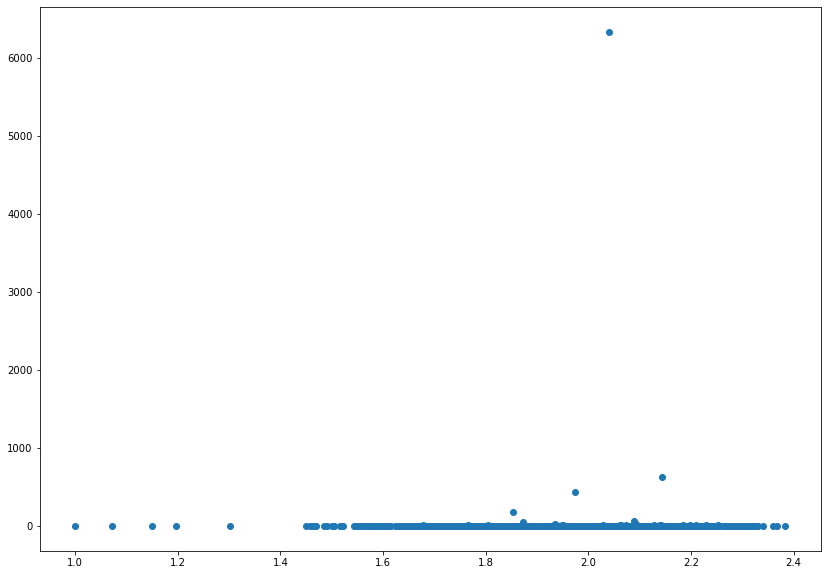

In [82]:
plt.figure(figsize=(14,10))
plt.scatter(test_X ** 0.1, test_y)

In [178]:
data['n_img'].value_counts()
df = data[(data['goal'] >= 5) & (data['n_img'] > 0)]
# data['n_img'] = data['n_img'].apply(lambda x: 10e-5 if x == 0 else x) #  using log to get normal distribution showed that we should remove all zero elements

In [222]:
n_imgs = []

for v in df['n_img'].unique():
    s = df[df['n_img'] == v]['succes_rate']
    if s.shape[0] > 5: 
        n_imgs.append((v, s.sum() / s.shape[0]))

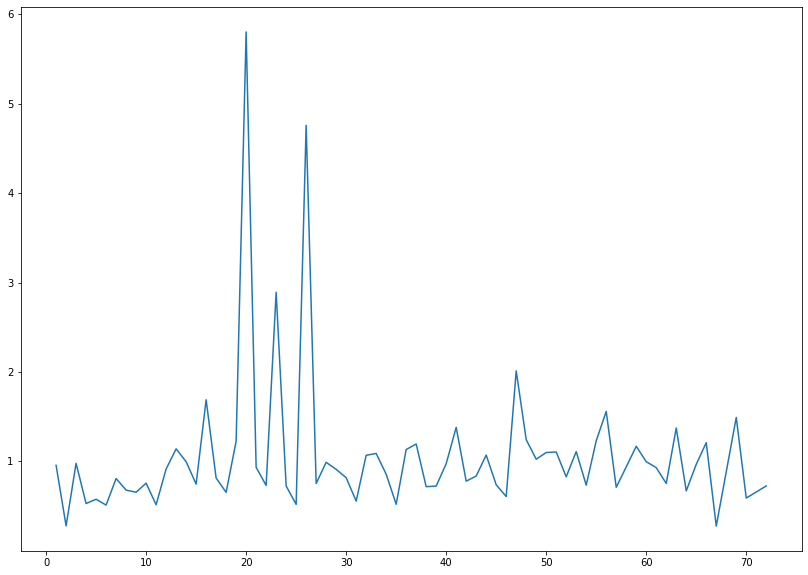

In [223]:
n_imgs = sorted(n_imgs, key=lambda x: x[0], reverse=True)

xs = [k for k, v in n_imgs]
ys = [v for k, v in n_imgs]

plt.figure(figsize=(14,10))
plt.plot(xs, ys)
plt.xlabel = 'n_imgs'
plt.ylabel = 'mean succes score'


In [224]:
new_xs = []
new_ys = []

for i in range(1, len(n_imgs)):
    new_xs.append(n_imgs[i][0])
    new_ys.append(n_imgs[i][1] - n_imgs[i - 1][1])

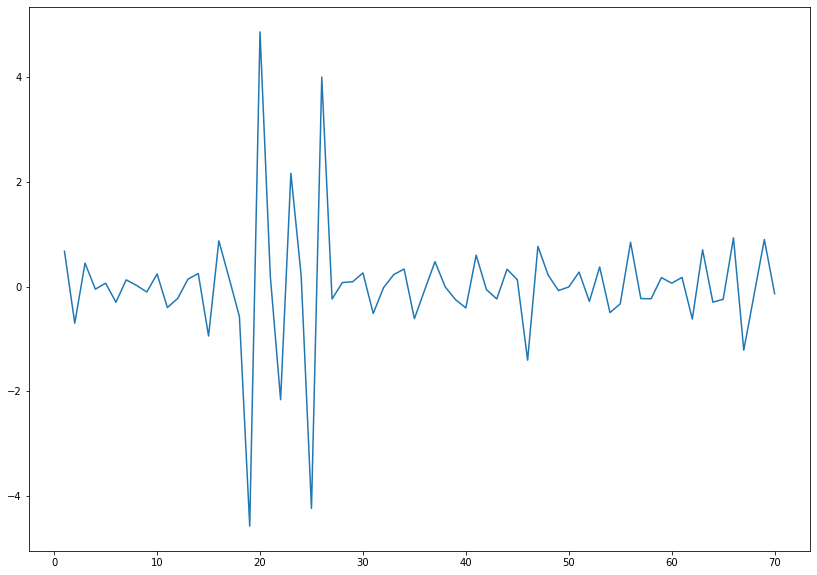

In [225]:
plt.figure(figsize=(14,10))
plt.plot(new_xs, new_ys)
plt.xlabel = 'n_imgs'
plt.ylabel = 'mean succes score'

<AxesSubplot:>

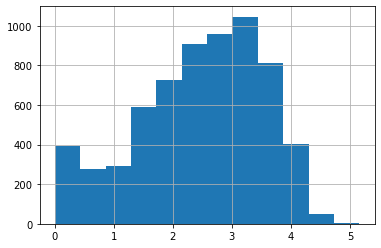

In [226]:
# hist for np.log(n_images)
np.log(df['n_img']).hist(bins=12)

<AxesSubplot:>

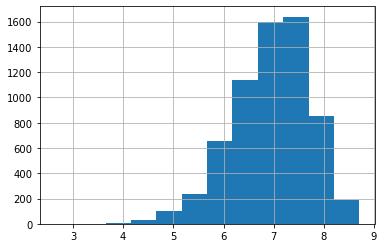

In [239]:
df  = df[df['text_am'] > 10]
np.log(df['text_am']).hist(bins=12)

In [240]:
df['text_am'].max()

6042

In [303]:
n_texts = []
n = 200
for v in range(1, df['text_am'].max(), n):
    s = df[(df['text_am'] >= v) & (df['text_am'] < v + n)]['succes_rate']
    if s.shape[0] > 5: 
        n_texts.append((f'{int((v +v + n) / 2)}', v, s.sum() / s.shape[0]))

In [304]:
n_texts = sorted(n_texts, key=lambda x: x[1])
n_texts = sorted(n_texts, key=lambda x: x[2], reverse=True)
n_texts

[('4301', 4201, 2.1928545758957907),
 ('901', 801, 1.566586745814526),
 ('3701', 3601, 1.5290253196366719),
 ('1501', 1401, 1.5013720904083894),
 ('701', 601, 1.4608580720688358),
 ('4501', 4401, 1.3801903055855704),
 ('3901', 3801, 1.2542145967607683),
 ('2901', 2801, 1.2171525920199102),
 ('3101', 3001, 1.1537874335505767),
 ('3301', 3201, 1.1372217168998195),
 ('3501', 3401, 1.0573338232940714),
 ('2101', 2001, 0.9955194613209789),
 ('2701', 2601, 0.9883652364768827),
 ('1701', 1601, 0.9423266728106627),
 ('4701', 4601, 0.9270848622139823),
 ('1101', 1001, 0.8747405526846085),
 ('2301', 2201, 0.853852011084352),
 ('4101', 4001, 0.8515540109531663),
 ('1901', 1801, 0.8371242619957764),
 ('501', 401, 0.8086905792767187),
 ('2501', 2401, 0.7962983884461223),
 ('1301', 1201, 0.7704737299627201),
 ('301', 201, 0.5238559552236309),
 ('101', 1, 0.35583220958640854)]

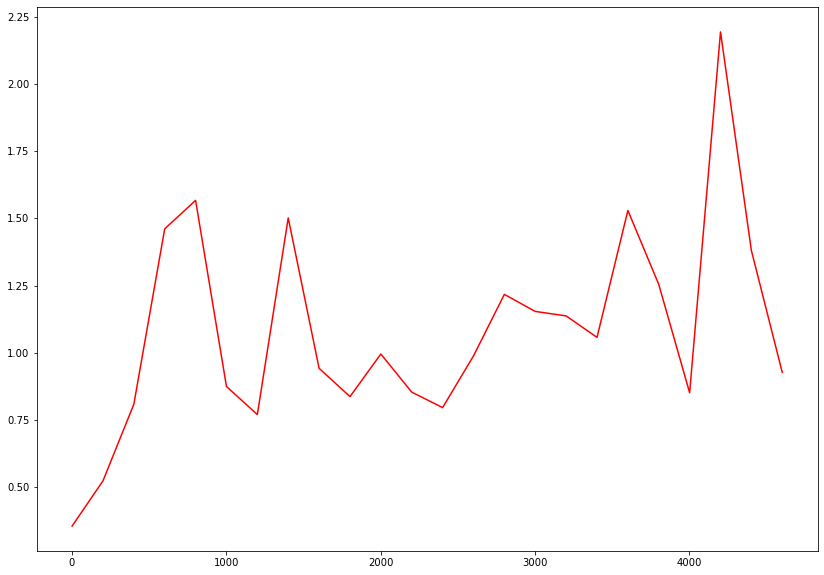

In [305]:
n_texts = sorted(n_texts, key=lambda x: x[1])

xs = [k for title, k, v in n_texts]
ys = [v for title, k, v in n_texts]

plt.figure(figsize=(14,10))
plt.plot(xs, ys, c='r')
plt.xlabel = 'n_imgs'
plt.ylabel = 'mean succes score'

In [306]:
new_xs = []
new_ys = []

for i in range(1, len(n_texts)):
    new_xs.append(n_texts[i][1])
    new_ys.append(n_texts[i][2] - n_texts[i - 1][2])

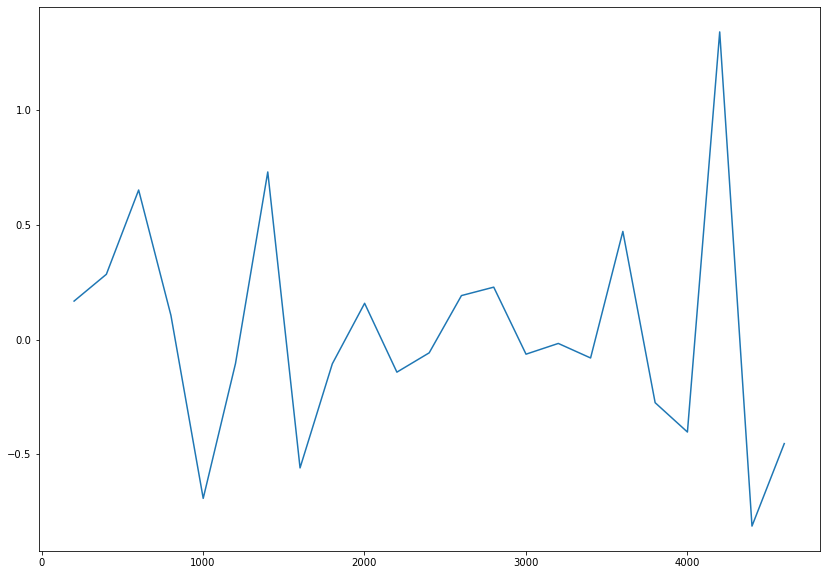

In [311]:
plt.figure(figsize=(14,10))
plt.plot(new_xs, new_ys)
plt.xlabel = 'n_imgs'
plt.ylabel = 'mean succes score'

In [318]:
def get_y(x, coeffs):
    y = 0
    for i in range(len(coeffs)):
        y += x**i * coeffs[-1 - i]
    return y

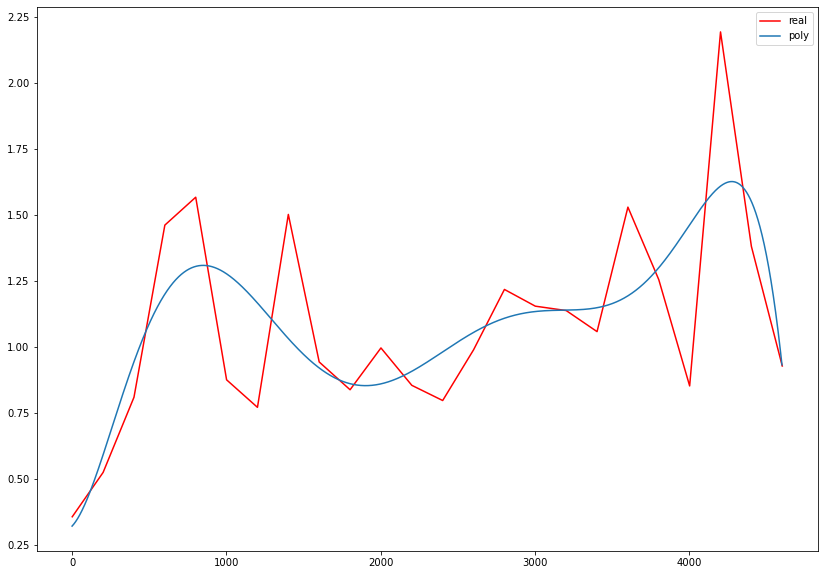

In [334]:
poly = np.polyfit(xs, ys, 7)

poly_xs = [i for i in range(4600)]
poly_ys= [get_y(i, poly) for i in range(4600)]

plt.figure(figsize=(14,10))

plt.plot(xs, ys, c='r', label='real')
plt.plot(poly_xs, poly_ys, label='poly')

plt.xlabel = 'n_imgs'
plt.ylabel = 'mean succes score'

plt.legend()

In [335]:
from torch import nn

In [338]:
numeric_data = data.corr().columns

In [322]:
model = nn.Sequential(
    nn.Linear(34, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    )